In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Task One

In [2]:
# Function to read MNIST data from CSV file
def read_mnist_csv(filename):
    return pd.read_csv(filename, header=None).values[:, 1:]  # Exclude the label column

# Path to the MNIST dataset
data_path = "mnist_dataset"

# Read MNIST train and test images from CSV files
train_images = read_mnist_csv(os.path.join(data_path, 'mnist_train.csv'))
test_images = read_mnist_csv(os.path.join(data_path, 'mnist_test.csv'))

"""
print(train_images.shape) = (60000, 784)

"""

'\nprint(train_images.shape) = (60000, 784)\n\n'

# Select the first image to do the project

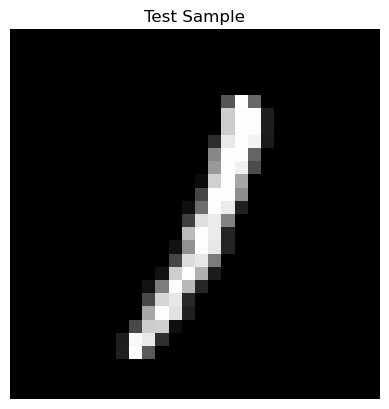

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  85 255 103   1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 205 253 253  30   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 205 253 253  30
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  44 233 253 244  27   0   0   

In [3]:
Test_sample = train_images[99]

# image show Test_sample
plt.imshow(Test_sample.reshape(-28, 28), cmap='gray')
plt.title(f'Test Sample')
plt.axis('off')
plt.show()

print(Test_sample)

In [4]:
# count the number of non-zero entries in Test_sample
print(np.count_nonzero(Test_sample))

84


In [5]:
# Generate fat random matrices with varying numbers of columns M

def generate_random_matrix(M, n_cols):
    while True:
        # Initialize an empty matrix
        matrix = np.zeros((M, n_cols))

        # Generate random values for each column
        for i in range(n_cols):
            # Generate a random column
            column = np.random.normal(loc=0, scale=1/np.sqrt(M), size=(M,))
            
            # Ensure the column is linearly independent from previous columns
            for j in range(i):
                # Subtract the projection of the new column onto previous columns
                column -= np.dot(matrix[:, j], column) * matrix[:, j]

            # Normalize the column to ensure its L2 norm is 1
            column /= np.linalg.norm(column)

            # Set the column in the matrix
            matrix[:, i] = column
        
        # Check if the rank condition is satisfied
        if np.linalg.matrix_rank(matrix) == M:
            break
    
    return matrix

# Basic Matching Pursuit algorithm
def basic_matching_pursuit(A, y, error):
    """
    Solve the Basis Pursuit problem using the Basic Matching Pursuit algorithm.

    Parameters:
    - A (ndarray): The measurement matrix.
    - y (ndarray): The measurement vector.
    - error (float): The error tolerance for stopping the algorithm.

    Returns:
    - z (ndarray): The estimated sparse vector.
    - r (ndarray): The residual vector.
    """
    z = np.zeros(A.shape[1])
    r = y
    iteration = 0
    
    while True:
        # Compute the correlation of the residual with each column of A
        correlations = np.abs(np.dot(A.T, r))
        # Find the index of the column with the maximum correlation
        j = np.argmax(correlations)
        # Update the estimate
        z[j] = z[j] + np.dot(A[:, j].T, r)
        # Update the residual
        r = y - np.dot(A, z)
        # Check the stopping criterion
        if np.linalg.norm(r) < error:
            break
        iteration += 1
    return z




0
1
2
3
4
5
6
7
8
9
10
11


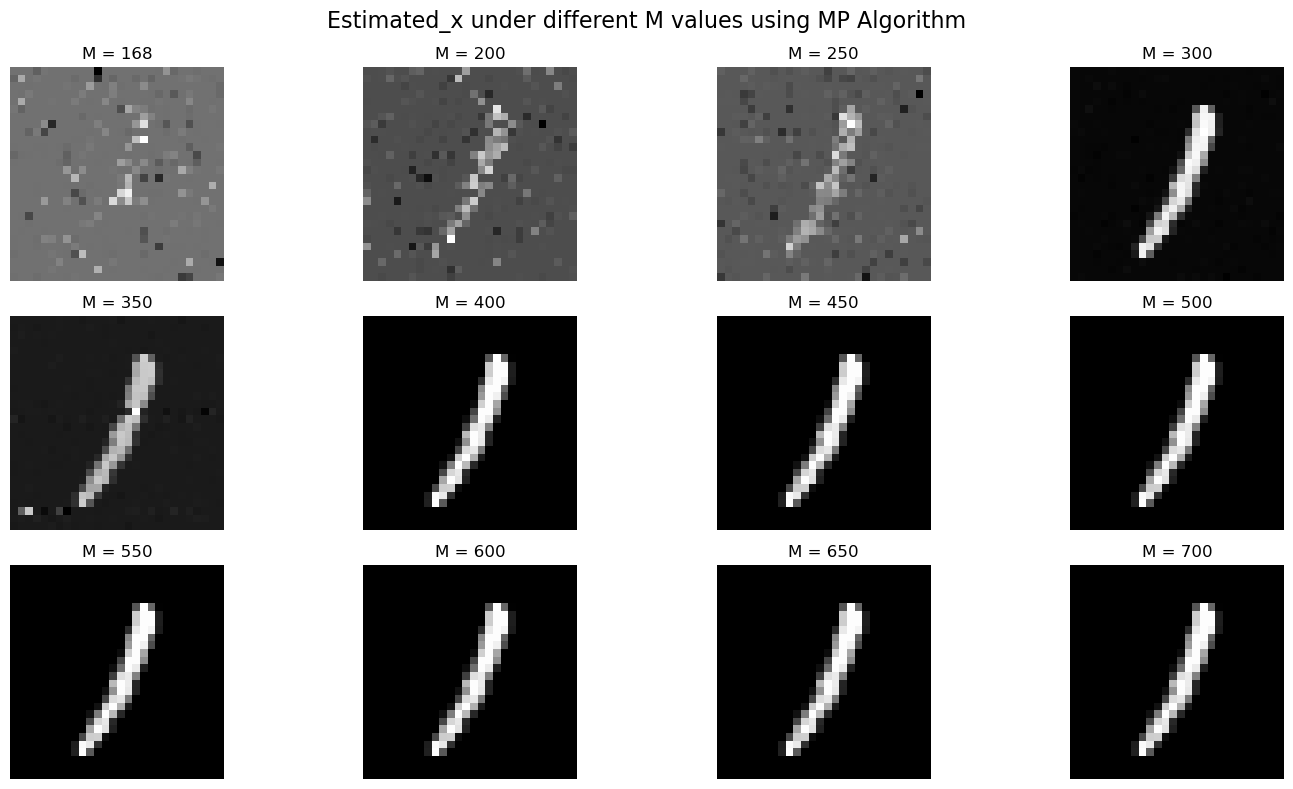

In [8]:
# Define your functions generate_random_matrix and orthogonal_matching_pursuit here

np.random.seed(42)  # set the random seed

# Number of measurements
M = [168, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]
MSE = []
Recovered_x = []
for i in range(len(M)):  
    A = generate_random_matrix(M[i], 784)
    y = np.dot(A, Test_sample)
    estimated_x = basic_matching_pursuit(A, y, 1e-12)
    Recovered_x.append(estimated_x)
    diff = Test_sample - estimated_x
    diff = diff / 255.0
    MSE.append(np.linalg.norm(diff))
    print(i)

# Reshape estimated_x to 28x28 image and plot
plt.figure(figsize=(15, 8))
for i in range(len(M)):
    plt.subplot(3, 4, i+1)
    plt.imshow(Recovered_x[i].reshape(28, 28), cmap='gray')
    plt.title(f'M = {M[i]}')
    plt.axis('off')

plt.suptitle('Estimated_x under different M values using MP Algorithm', fontsize=16)
plt.tight_layout()
plt.show()    

In [9]:
print(MSE)


[7.34440883831099, 5.2590405557734785, 4.2354064876471496, 0.20399989598617208, 1.5860433629458492, 3.5325245993104957e-11, 1.769486811671614e-13, 4.94829283525064e-15, 4.257307829771608e-15, 4.42558504109913e-15, 4.125340234683867e-15, 3.773147681103597e-15]


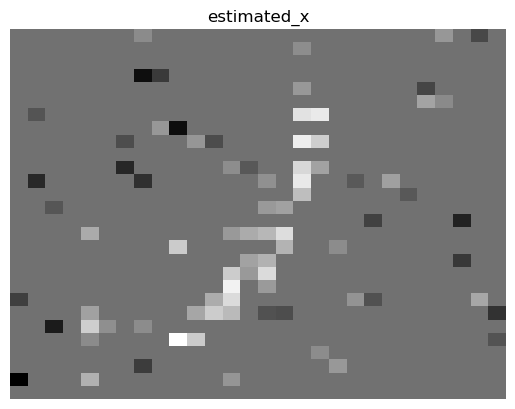

In [42]:
# reshape estimated_x to 28x28 image
plt.imshow(estimated_x.reshape(-28, 28), cmap='gray', aspect='auto')
plt.title(f'estimated_x')
plt.axis('off')
plt.show()

In [43]:
# calculate the l2 norm of error
mse = np.linalg.norm(error)
print(mse)

302.2004605917891
